Simple linear regression

Boston housing dataset is in sklearn

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt

boston = load_boston()
target = boston.target
boston = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [2]:
boston.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

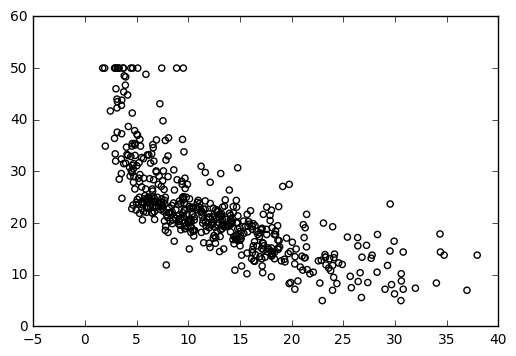

In [3]:
plt.scatter(boston.LSTAT, target, facecolor = 'none', edgecolors = 'black');

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
fit1 = smf.ols('target~LSTAT', boston).fit()

In [6]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           5.08e-88
Time:                        17:46:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

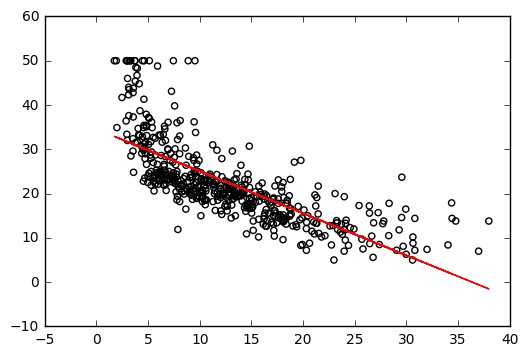

In [7]:
plt.scatter(boston.LSTAT, target, facecolor = 'none', edgecolors = 'black');
plt.plot(boston.LSTAT, fit1.fittedvalues, '-', color = 'red');

In [8]:
fit1.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


In [9]:
Xnew = np.linspace(5, 15, 3)
ynewpred = fit1.predict({"LSTAT": np.linspace(5, 15, 3)})

In [10]:
ynewpred

array([ 29.80359411,  25.05334734,  20.30310057])

In [11]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#this gives the prediction interval. statsmodels does not seem to have a direct way to get confidence interval for out of sample
prstd2, iv_l2, iv_u2 = wls_prediction_std(fit1, sm.add_constant(Xnew))
iv_l2, iv_u2

(array([ 17.56567478,  12.82762635,   8.0777421 ]),
 array([ 42.04151344,  37.27906833,  32.52845905]))

Multiple linear regression

In [12]:
fit2 = smf.ols('target~LSTAT+AGE', boston).fit()

In [13]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           2.98e-88
Time:                        17:46:17   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000        31.787    34.659
LSTAT         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
AGE            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
all_columns = "+".join(boston.columns)
fit3 = smf.ols('target~'+all_columns, boston).fit()

In [15]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 20 Dec 2016   Prob (F-statistic):          6.95e-135
Time:                        17:46:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
columns = "+".join(boston.columns.difference(['AGE', 'INDUS']))
fit4 = smf.ols('target~'+columns, boston).fit()

In [17]:
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 20 Dec 2016   Prob (F-statistic):          5.74e-137
Time:                        17:46:17   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.3694      5.069      7.176      0.000        26.411    46.328
B              0.0094      0.003      3.508      0.000         0.004     0.015
CHAS           2.7212      0.854      3.185      0.002         1.043     4.400
CRIM          -0.1076      0.033     -3.296      0.001        -0.172    -0.043
DIS           -1.4934      0.186     -8.039      0.000        -1.858    -1.128
LSTAT         -0.5232      0.047    -11.037      0.000        -0.616    -0.430
NOX          -17.3956      3.536     -4.920      0.000       -24.343   -10.448
PTRATIO       -0.9471      0.129     -7.337      0.000        -1.201    -0.693
RAD            0.2991      0.063      4.719      0.000         0.175     0.424
RM             3.7966      0.406      9.343      0.000         2.998     4.595
TAX           -0.0118      0.003     -3.488      0.001        -0.018    -0.005
ZN             0.0458      0.014      3.387      0.001         0.019     0.072
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
fit5 = smf.ols('target~LSTAT*AGE', boston).fit()

In [19]:
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           4.86e-88
Time:                        17:46:17   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000        33.201    38.976
LSTAT         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
AGE           -0.0007      0.020     -0.036      0.971        -0.040     0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
fit6=smf.ols('target~LSTAT + np.power(LSTAT,2)', boston).fit()

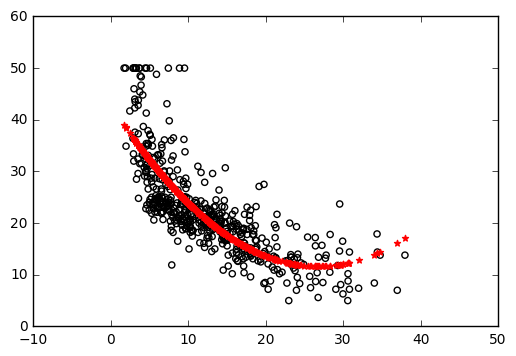

In [21]:
plt.scatter(boston.LSTAT, target, facecolor = 'none', edgecolors = 'black');
plt.scatter(boston.LSTAT, fit6.fittedvalues, color = 'red', marker = '*');

In [22]:
fit7=smf.ols('target~LSTAT + np.power(LSTAT,2) + np.power(LSTAT,3) + np.power(LSTAT,4)', boston).fit()

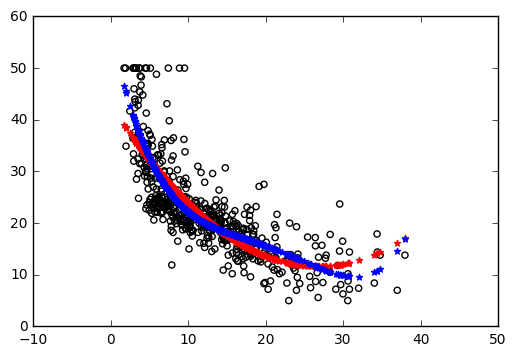

In [23]:
plt.scatter(boston.LSTAT, target, facecolor = 'none', edgecolors = 'black');
plt.scatter(boston.LSTAT, fit6.fittedvalues, color = 'red', marker = '*');
plt.scatter(boston.LSTAT, fit7.fittedvalues, color = 'blue', marker = '*');

Qualitative predictors

In [24]:
Carseats = pd.read_csv("./DataSets/Carseats.csv")

In [25]:
Carseats.columns.values

array(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object)

In [26]:
Carseats.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [27]:
all_columns = "+".join(Carseats.columns.difference(['Sales']))
fit1 = smf.ols('Sales~' + all_columns +'+Income:Advertising + Age:Price', Carseats).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 20 Dec 2016   Prob (F-statistic):          6.14e-166
Time:                        17:46:18   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000         4.592     8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000         4.548     5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000         1.706     2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291        -0.450     0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213        -0.081     0.361
Advertising             0.0702      0.023      3.107      0.002         0.026     0.115
Age                    -0.0579      0.016     -3.633      0.000        -0.089    -0.027
CompPrice               0.0929      0.004     22.567      0.000         0.085     0.101
Education              -0.0209      0.020     -1.063      0.288        -0.059     0.018
Income                  0.0109      0.003      4.183      0.000         0.006     0.016
Population              0.0002      0.000      0.433      0.665        -0.001     0.001
Price                  -0.1008      0.007    -13.549      0.000        -0.115    -0.086
Income:Advertising      0.0008      0.000      2.698      0.007         0.000     0.001
Age:Price               0.0001      0.000      0.801      0.424        -0.000     0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
sm.categorical(Carseats.ShelveLoc.values)

array([['Bad', 1.0, 0.0, 0.0],
       ['Good', 0.0, 1.0, 0.0],
       ['Medium', 0.0, 0.0, 1.0],
       ..., 
       ['Medium', 0.0, 0.0, 1.0],
       ['Bad', 1.0, 0.0, 0.0],
       ['Good', 0.0, 1.0, 0.0]], dtype=object)

Writing functions

In [29]:
def regplot(x,y):
    fit = sm.OLS(y,sm.add_constant(x)).fit()
    plt.scatter(x,y,facecolor = 'none', edgecolors = 'black');
    plt.plot(x, fit.fittedvalues, '-', color = 'red');

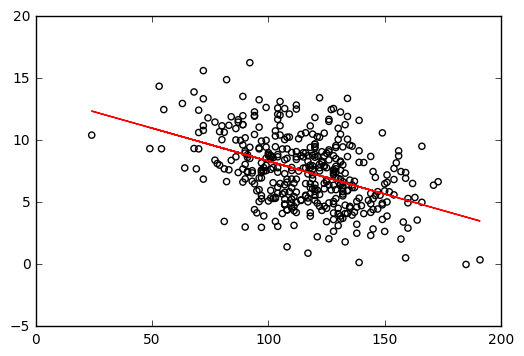

In [30]:
regplot(Carseats.Price, Carseats.Sales)